In [74]:
from sklearn.metrics import roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import itertools

In [75]:
train_df = pd.read_csv('../../dataset/d3features.csv')
#print len(list(train_df))
#print 'Prediction Column: ',list(set(train_df)-set(test_df))[0]

In [76]:
X = train_df.iloc[:,0:len(list(train_df))-1]
Y = list(train_df.iloc[:,-1])

In [77]:
for i in range (0,len(Y)):
    if Y[i] == 1:
        Y[i] = 0
    else:
        Y[i] = 1

In [78]:
#sm = SMOTETomek(random_state=42)
#X_res, y_res = sm.fit_sample(X, y)
X = StandardScaler().fit_transform(X)
#pca = IncrementalPCA(n_components=2)
#X = pca.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

names = [
          "LinearSVM","LogisticRegression","MLPClassifier"
        ]
classifiers = [
               LinearSVC(random_state=0),LogisticRegression(),MLPClassifier(),
              ]

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Calculating for model:  LinearSVM
LinearSVM Score: 0.96699669967
LinearSVM Recall metric in the testing dataset:  1.0


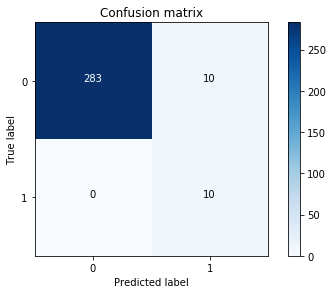

LinearSVM Precision:  0.5
LinearSVM Recall:  1.0
LinearSVM F1 Score:  0.666666666667 


Calculating for model:  LogisticRegression
LogisticRegression Score: 0.986798679868
LogisticRegression Recall metric in the testing dataset:  0.9


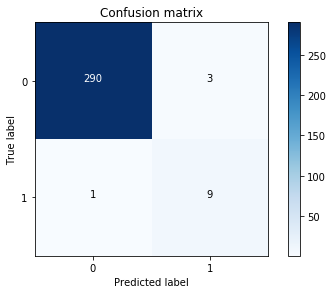

LogisticRegression Precision:  0.75
LogisticRegression Recall:  0.9
LogisticRegression F1 Score:  0.818181818182 


Calculating for model:  MLPClassifier
MLPClassifier Score: 0.983498349835
MLPClassifier Recall metric in the testing dataset:  0.7


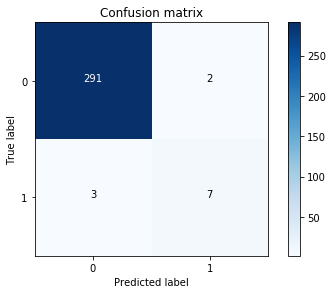

MLPClassifier Precision:  0.777777777778
MLPClassifier Recall:  0.7
MLPClassifier F1 Score:  0.736842105263 




In [81]:
for name, clf in zip(names, classifiers):
        
        print "Calculating for model: ",name
        clf.fit(X_train, y_train)
        #filename = name+'.sav'
        #pickle.dump(clf, open(filename, 'wb'))
        score = clf.score(X_test, y_test)
        print name+' Score:',score
        prediction1 = clf.predict(X_test)



        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test,prediction1)
        np.set_printoptions(precision=2)

        print name+" Recall metric in the testing dataset: ", np.true_divide(cnf_matrix[1,1],(cnf_matrix[1,0]+cnf_matrix[1,1]))

        # Plot non-normalized confusion matrix
        class_names = [0,1]
        plt.figure()
        plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
        plt.show()


        print name+" Precision: ", np.true_divide(cnf_matrix[1,1],(cnf_matrix[0,1]+cnf_matrix[1,1]))

        recall=np.true_divide(cnf_matrix[1,1],(cnf_matrix[1,0]+cnf_matrix[1,1]))
        print name+" Recall: ", recall
        precision=np.true_divide(cnf_matrix[1,1],(cnf_matrix[0,1]+cnf_matrix[1,1]))
        f1score=2*np.true_divide(precision*recall,(precision+recall))

        print name+" F1 Score: ", f1score,"\n\n"